# Motor RPM
-----

First, we need to figure out what initial velocity we need for the ring in order to hit our target

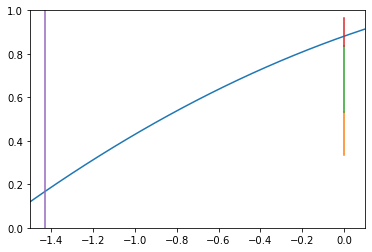

In [12]:
import matplotlib.pyplot as plt
import numpy as np

init_x = -1.5                  #m
init_y = 0.12                  #m
gravity = 9.8                  #m/s^2
initial_velocity = 8           #m/s
launch_angle = np.radians(34)  #radians

initial_velocity_x = initial_velocity*np.cos(launch_angle)
initial_velocity_y = initial_velocity*np.sin(launch_angle)

def x_pos(t):
    return (t*initial_velocity_x)+init_x

def y_pos(t):
    return (t*initial_velocity_y-0.5*gravity*t**2)+init_y

x = []
y = []

for t in range(0, 50): #0.5 seconds of travel, in hundredths of a second
    x.append(x_pos(t/100))
    y.append(y_pos(t/100))

plt.plot(x, y)
plt.xlim(init_x,0.1)
plt.ylim(0,1)

plt.plot([0,0],[0.333,0.533]) #low goal
plt.plot([0,0],[0.533,0.838]) #mid goal
plt.plot([0,0],[0.838,0.965]) #high goal
plt.plot([-1.43,-1.43],[0,1]) #shooting line

plt.show()

We now know that $8$ $\frac{m}{s}$ seems like a good initial velocity. 

This means that the outer edge of our wheel or belt must be moving at $8 \times 2 = 16 \frac{m}{s}$

If our wheel or belt is $0.1\:m$ in diameter, the circumference is $\pi \times 0.1 \approx .314m$

$\frac{16\:meters}{second} \times \frac{rotation}{0.314\:meters} \times \frac{60\:seconds}{minute} =  \frac{960\:rotations}{0.314\:minute}$

So our motor must be spinning at $\frac{960}{0.314} \approx 3057$ rpm

This is the **minimum** required rpm and should probably be doubled to account for air resistance and other factors





# Torque
----

![title](problem.jpg)

If we assume that the the relationship between $F$ and $F_c$ is such that the ring is rolling without slipping, the force $F$ that we need to apply over distance $d$ is $\frac{v_f^2 (\frac{I}{r^2} + m)} {4d}$ where $v_f$ is the final velocity we want, $m$ is the mass of the ring,  $r$ is the radius of the ring, and $I$ is moment of inertia of the ring. The torque we need on the motor is that multiplied by the radius of our shooting wheel.

As the decided earlier, we want a final velocity for the ring of $8\:\frac{m}{s}$

The radius of the ring is 2.5 inches or around $0.064\:m$

The mass of the ring is $30\:g$ or $0.03\:kg$

According to [wikipedia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia) the moment of inertia for a torus is $\frac{1}{4} m ( 4b^{2} + 3a^{2})$ where $a$ is the minor radius, $b$ is the major radius and $m$ is the mass. The mass of our ring is $0.03\:kg$ and the shape can be approximated as a torus with a major radius of $0.05\:m$ and minor radius of $0.011\:m$, so our moment of inertia is $\frac{1}{4} \times 0.03 ( 4 \times 0.05 ^{2} + 3 \times 0.011 ^{2}) \approx 0.0000777\: kg\:m^{2}$

$d$ will vary with our shooter design, but if we use a single 4 in wheel, it is likely to be something like $0.05\:m$

Therefore, the force needed is $\frac{8^2 (\frac{0.0000777}{0.064^2} + 0.03)} {4\times0.05} \approx 15.67\: N$

Applying this through the $0.05\:m$ radius of our wheel gives us $15.57\:N \times 0.05\:m \approx 0.779\:Nm$ of torque.

This is a LOT of torque for that speed and would need something like 6 1:1 motors geared together (or a big flywheel)

If we instead used 2 wheels in line with eachother, $d$ would be doubled and the requred torque would be halved

If we used a 180 degree shooter, $d$ would be half the circumference of the wheel, the torque needed would be around $0.25\:Nm$, and two 1:1 motors might be sufficient

With a belted shooter, $d$ could be as big as we want, if it was 10 inches, only $0.15\:Nm$ of torque would be needed. If you wanted to push it, you might be able to get away with 1 1:1 motor, geared down slightly. (This is assuming the pulleys are the same radius as the wheels, which is probably not the case)

All the above torque estimates are the **minimum** required and should probably be doubled to account for friction and other factors. They are also using the stall torque of the motors, and you dont want to get anywhere near that in normal operation.